#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the Fashion Minst dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: Fashion MNIST dataset

We will use the Fashion MNIST dataset, a dataset of Zalando's articles. Each sample is a 28x28 pixels grayscale image, associated with a label from 10 classes:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Each pixel intensity is represented by a uint8 (byte) from 0 to 255.
We will divide the dataset in training, validation and test set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of the deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one). Therefore we use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims) to transform each image from a matrix to a 3-dimensional tensor. Finaly we have to normalize the input data.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Let's take a look at a sample of the images in the dataset:

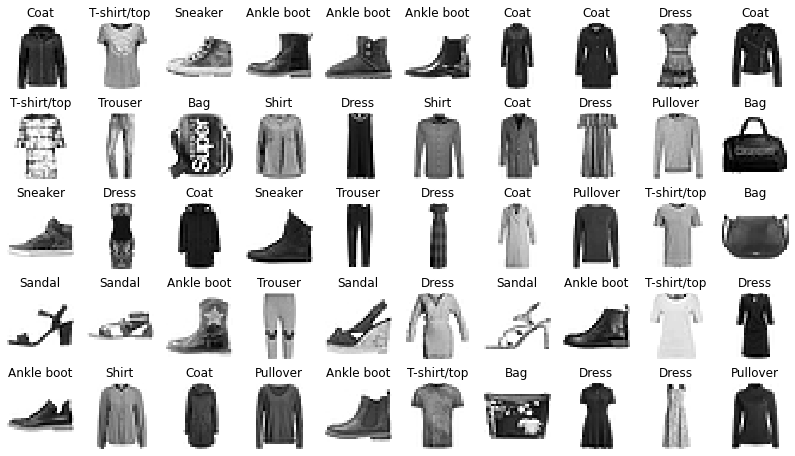

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

mean = np.mean(X_train, axis=0)
standard_deviation = np.std(X_train, axis=0)

X_train = (X_train - mean) / standard_deviation
X_valid = (X_valid - mean) / standard_deviation
X_test = (X_test - mean) / standard_deviation

#Add one dimension to manage the channel
X_train=tf.expand_dims(X_train, 3) 
X_valid=tf.expand_dims(X_valid, 3) 
X_test=tf.expand_dims(X_test, 3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 3s 7ms/step - loss: 0.9975 - accuracy: 0.6920 - val_loss: 0.5079 - val_accuracy: 0.8328
Epoch 2/10
430/430 [==============================] - 3s 6ms/step - loss: 0.4956 - accuracy: 0.8301 - val_loss: 0.4403 - val_accuracy: 0.8488
Epoch 3/10
430/430 [==============================] - 3s 6ms/step - loss: 0.4360 - accuracy: 0.8495 - val_loss: 0.4077 - val_accuracy: 0.8622
Epoch 4/10
430/430 [==============================] - 3s 6ms/step - loss: 0.4025 - accuracy: 0.8603 - val_loss: 0.3940 - val_accuracy: 0.8652
Epoch 5/10
430/430 [==============================] - 3s 6ms/step - loss: 0.3801 - accuracy: 0.8685 - val_loss: 0.3705 - val_accuracy: 0.8772
Epoch 6/10
430/430 [==============================] - 3s 6ms/step - loss: 0.3694 - accuracy: 0.8709 - val_loss: 0.3747 - val_accuracy: 0.8732
Epoch 7/10
430/430 [==============================] - 3s 6ms/step - loss: 0.3487 - accuracy: 0.8780 - val_loss: 0.3576 - val_accuracy: 0.8798
Epoch 

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 0.3596 - accuracy: 0.8742
accuracy: 87.42%


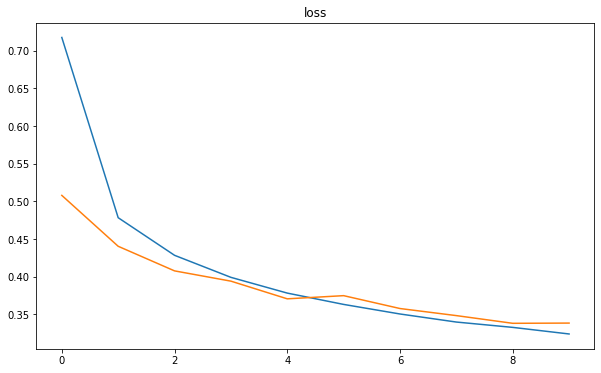

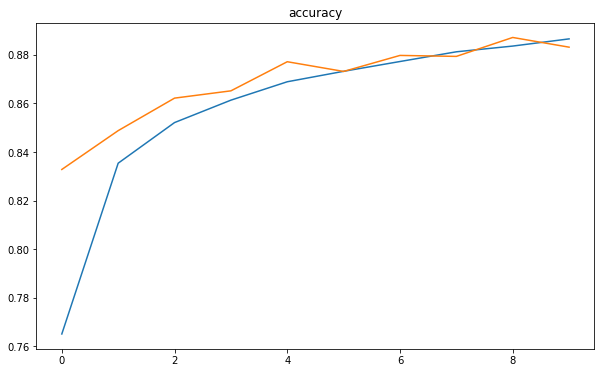

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

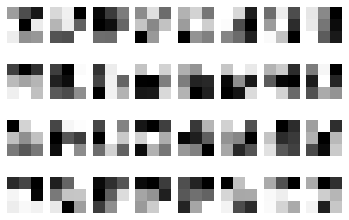

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
___________________________________________________

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   The number of parameters in the 2D convolution layer depends on the size of the kernel size. The kernel is a filter that is applied to the channels of the input image. To perform a convolution, I need to learn a kernel for each input image channel, in order to apply a convolution on the entire image to compute each output channel. For this reason, I need to learn different kernels for each different output dimension. The image size does not affect the number of parameters because they are shared for each convolution computed on the same channel.
The number of parameters for each convolution layer is determined by the following formula:
$n\_output\_channels \cdot (n\_input\_channels \cdot kernel\_height \cdot kernel\_width + 1)$, where $+ 1$ is the bias. So:
* the number of the parameters for the first layer is $32 \cdot (1 \cdot 3 \cdot 3 + 1) = 320$;
* the number of the parameters for the second layer is $16 \cdot (32 \cdot 2 \cdot 2 + 1) = 2064$.

2.   The two convolutional layers have a different number of parameters because the input and output channels of the image and the kernel size change. Starting from this point, we can notice:
* For the first layer, it has a 3x3 kernel size, an input image with 1 channel and it produces in ouput an image with 32 channels;
* For the second layer, it has a 2x2 kernel size, an input image with 32 channels and it produces in output an image with 16 channels.



Let's now train our deep CNN.

Epoch 1/10
430/430 [==============================] - 4s 7ms/step - loss: 1.5854 - accuracy: 0.4546 - val_loss: 0.6564 - val_accuracy: 0.7618
Epoch 2/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6323 - accuracy: 0.7663 - val_loss: 0.5577 - val_accuracy: 0.8010
Epoch 3/10
430/430 [==============================] - 3s 7ms/step - loss: 0.5424 - accuracy: 0.8024 - val_loss: 0.4925 - val_accuracy: 0.8312
Epoch 4/10
430/430 [==============================] - 3s 7ms/step - loss: 0.4889 - accuracy: 0.8239 - val_loss: 0.4635 - val_accuracy: 0.8378
Epoch 5/10
430/430 [==============================] - 3s 7ms/step - loss: 0.4668 - accuracy: 0.8333 - val_loss: 0.4412 - val_accuracy: 0.8482
Epoch 6/10
430/430 [==============================] - 3s 7ms/step - loss: 0.4449 - accuracy: 0.8434 - val_loss: 0.4534 - val_accuracy: 0.8438
Epoch 7/10
430/430 [==============================] - 3s 7ms/step - loss: 0.4276 - accuracy: 0.8498 - val_loss: 0.4205 - val_accuracy: 0.8572
Epoch 

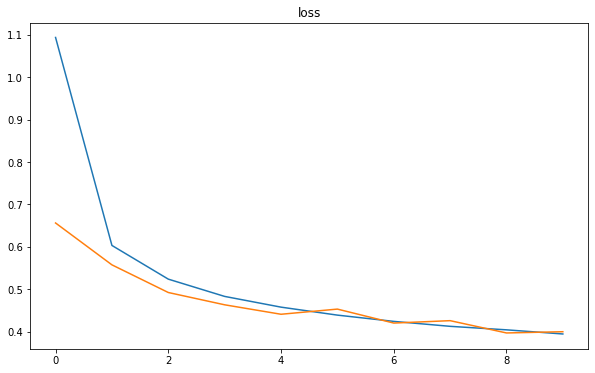

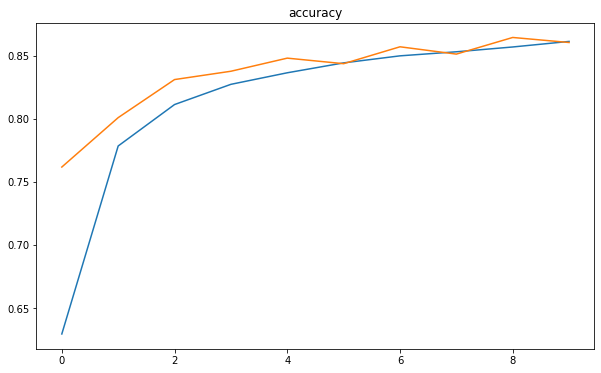

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3, 3], activation="relu", input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D(pool_size=[2, 2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2, 2], activation="relu"),
    keras.layers.MaxPool2D(pool_size=[2, 2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_39 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
___________________________________________________

Epoch 1/100
430/430 [==============================] - 4s 8ms/step - loss: 1.4544 - accuracy: 0.5152 - val_loss: 0.6646 - val_accuracy: 0.7756
Epoch 2/100
430/430 [==============================] - 3s 7ms/step - loss: 0.6450 - accuracy: 0.7713 - val_loss: 0.5413 - val_accuracy: 0.8132
Epoch 3/100
430/430 [==============================] - 3s 7ms/step - loss: 0.5537 - accuracy: 0.8022 - val_loss: 0.4875 - val_accuracy: 0.8372
Epoch 4/100
430/430 [==============================] - 3s 7ms/step - loss: 0.4917 - accuracy: 0.8259 - val_loss: 0.4563 - val_accuracy: 0.8472
Epoch 5/100
430/430 [==============================] - 3s 6ms/step - loss: 0.4630 - accuracy: 0.8386 - val_loss: 0.4428 - val_accuracy: 0.8522
Epoch 6/100
430/430 [==============================] - 3s 6ms/step - loss: 0.4455 - accuracy: 0.8428 - val_loss: 0.4196 - val_accuracy: 0.8604
Epoch 7/100
430/430 [==============================] - 3s 6ms/step - loss: 0.4290 - accuracy: 0.8493 - val_loss: 0.4133 - val_accuracy: 0.8610

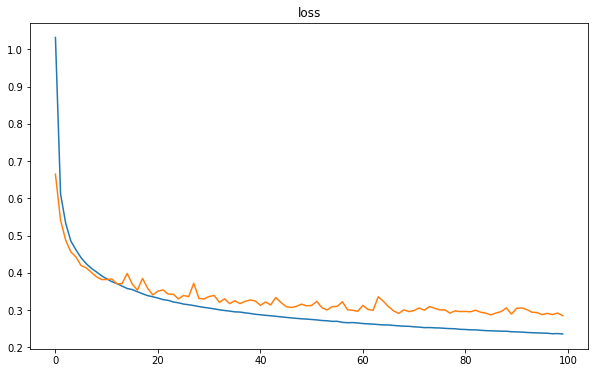

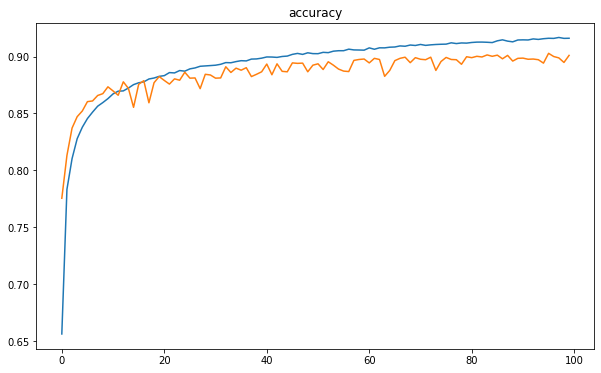

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found has the following layers and hyperparameters:
  * Conv2D layer with:
    * 32 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Conv2D layer with:
    * 16 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Flatten
  * Dense layer with: 
    * 10 neurons (one for each class)
    * Softmax as activation function
  * Optmizer: SGD
  * Batch size: 128
  * Epochs: 100

The achieved accuracy in the test set is 89.40% with a loss value of 0.3069.

Discussion: Through this model the accuracy increased by 3.79% and the loss decreased by 0.1062. The main reason of this improvement is given by the increase of epochs. The default epoch value of the initial model does not allow the network to learn sufficiently from the training set. 

Besides, I tested also other models: 
* **Model 1**: change the optimizer from SGD to Adam
  * Conv2D layer with:
    * 32 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Conv2D layer with:
    * 16 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Flatten
  * Dense layer with: 
    * 10 neurons (one for each class)
    * Softmax as activation function
  * Epochs: 10
  * Batch size: 128
  
  Result:
  * Accuracy: 88.56%
  * Loss: 0.3240

* **Model 2**: change the epochs from 10 to 50
  * Conv2D layer with:
    * 32 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Conv2D layer with:
    * 16 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Flatten
  * Dense layer with: 
    * 10 neurons (one for each class)
    * Softmax as activation function
  * Optmizer: SGD
  * Batch size: 128

  Result:
  * Accuracy: 88%
  * Loss: 0.3384

* **Model 3**: change the epochs from 10 to 150
  * Conv2D layer with:
    * 32 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Conv2D layer with:
    * 16 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Flatten
  * Dense layer with: 
    * 10 neurons (one for each class)
    * Softmax as activation function
  * Optmizer: SGD
  * Batch size: 128

  Result:
  * Accuracy: 89.29%
  * Loss: 0.3203

* **Model 4**: change batch size from 128 to 64
  * Conv2D layer with:
    * 32 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Conv2D layer with:
    * 16 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Flatten
  * Dense layer with: 
    * 10 neurons (one for each class)
    * Softmax as activation function
  * Optmizer: SGD
  * Epochs: 10

  Result:
  * Accuracy: 86.80%
  * Loss: 0.3785

* **Model 5**: change batch size from 128 to 256
  * Conv2D layer with:
    * 32 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Conv2D layer with:
    * 16 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Flatten
  * Dense layer with: 
    * 10 neurons (one for each class)
    * Softmax as activation function
  * Optmizer: SGD
  * Epochs: 10

  Result:
  * Accuracy: 84.14%
  * Loss: 0.4581

* **Model 6**: change activation function from ReLU to Softplus
  * Conv2D layer with:
    * 32 filters
    * 3x3 kernel size
  * MaxPool2D layer with 2x2 as pool size
  * Conv2D layer with:
    * 16 filters
    * 3x3 kernel size
  * MaxPool2D layer with 2x2 as pool size
  * Flatten
  * Dense layer with: 
    * 10 neurons (one for each class)
    * Softmax as activation function
  * Optmizer: SGD
  * Epochs: 10
  * Batch size: 128

  Result:
  * Accuracy: 82.41%
  * Loss: 0.4904

* **Model 7**: change pool size from 2x2 to 3x3
  * Conv2D layer with:
    * 32 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer
  * Conv2D layer with:
    * 16 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer
  * Flatten
  * Dense layer with: 
    * 10 neurons (one for each class)
    * Softmax as activation function
  * Optmizer: SGD
  * Epochs: 10
  * Batch size: 128

  Result:
  * Accuracy: 79.58%
  * Loss: 0.6041

* **Model 8**: increase the number of layers/filters
  * Conv2D layer with:
    * 64 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Conv2D layer with:
    * 32 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Conv2D layer with:
    * 16 filters
    * 3x3 kernel size
    * ReLU as activation function
  * MaxPool2D layer with 2x2 as pool size
  * Flatten
  * Dense layer with: 
    * 10 neurons (one for each class)
    * Softmax as activation function
  * Optmizer: SGD
  * Batch size: 128
  * Epochs: 100

  Result:
  * Accuracy: 81.57%
  * Loss: 0.5224

Discussion: 
* **Model 1**: this is the second best model. Changing from SGD to Adam produced an accuracy near to the first model. Adam is a better optimizer because it uses an adaptive learning and momentum techniques;

* **Model 2 and 3**: increasing the epochs value has been a good choice. But when I increased the epochs value to 150 I noticed that the model tended to overfit;

* **Model 4 and 5**: increasing the value of batch size leads to worse results. The reason may be due by the amount of stochasticity introduced. Using smaller batch sizes have been empirically shown to have faster convergence to *good* solutions;

* **Model 6**: ReLU and Softplus are similar, except near zero, where Softplus is more smooth and differentiable than ReLU. The advantage of using ReLU instead of Softplus is that it is much easier and efficient to compute ReLU and its derivative than the softplus function which has logarithm and exponential in its formulation;

* **Model 7**: this model has one of the worst performance than the other models. The reason is that increasing the size of the pool also increases downsampling. The size of the images is not very large, so if we apply a strong downsampling, we can risk removing from the model too much information needed to learn;

* **Model 8**: the increase of layers and filters led to a bad accuracy. The reason is than the network is bigger that the original, so it has many parameters to estimate than before. Thus, the number of epochs is not enough to learn.